## Case study
The two datasets are related to red and white variants 
of the Portuguese "Vinho Verde" wine. 
For more details, consult the reference [Cortez et al., 2009].
Due to privacy and logistic issues, only physicochemical 
(inputs) and sensory (the output) variables are available 
(e.g. there is no data about grape types, wine brand, 
wine selling price, etc.). 

In [279]:
import random
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# for 3D projections
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, precision_recall_fscore_support
import operator
from sklearn.tree import export_graphviz

In [3]:
base_directory = 'D:\\iswd_1\\um\\laby\\case_study\\' 
dataset_path = 'data'
dataset_name = 'winequality-white.csv'

In [4]:
plot_directory = 'plots'
def save_plot(plt, name, extension='svg'):
    plt.savefig('{}/{}/{}.{}'.format(base_directory, plot_directory, name, extension))

In [35]:
def add_labels_to_grades(data, mapping, mapping_name):
    def get_names_from_mapping(mapping):
        names=[]
        for v in mapping.values():
            if v not in names:
                names.append(v)
        return names
    
    names = get_names_from_mapping(mapping)
    data[mapping_name] = data['quality'].map(mapping)
    data[mapping_name] = pd.Categorical(data[mapping_name], categories=names)
    
    proportions = wine_data[mapping_name].value_counts()
    return [(name, prop) for name, prop in zip(proportions.index, proportions.data)]

In [36]:
# read dataset
from sklearn.model_selection import train_test_split

# load dataset and display few records
wine_data = pd.read_csv('{}/{}/{}'.format(base_directory, dataset_path, dataset_name), sep=';')
# print(wine_data.head())

StandardScaler(copy=True, with_mean=True, with_std=True)

In [92]:
# add unbalanced, balanced categories
reverse_mapping = {'low': 0, 'medium': 1, 'high': 2}
names = ['low', 'medium', 'high']
unbalanced = {3: 'low', 4: 'low', 5: 'medium', 6: 'medium', 7: 'medium', 8: 'high', 9: 'high'} 
proportions_unbalanced = add_labels_to_grades(wine_data, unbalanced, 'quality_unbalanced_mapping')
balanced = {3: 'low', 4: 'low', 5: 'low', 6: 'medium', 7: 'high', 8: 'high', 9: 'high'} 
proportions_balanced = add_labels_to_grades(wine_data, balanced, 'quality_balanced_mapping')

# low, medium, high are ordinal values low < medium < high
# so we don't need to use one-hot encoding
wine_data['quality_balanced_mapping'] = wine_data['quality_balanced_mapping'].map(reverse_mapping)
wine_data['quality_unbalanced_mapping'] = wine_data['quality_unbalanced_mapping'].map(reverse_mapping)
print(wine_data.head())


output_variable_index = wine_data.shape[1]-3
X, y = wine_data.iloc[:, 0:output_variable_index].values, wine_data.iloc[:, output_variable_index:].values
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.1, random_state=0)
    

print(X_train[202:215, :], print(y_train[202:215, :]))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  quality_unbalanced_mapping  quality_balanced_mapping  
0      8.8

In [45]:
# scale data
scaler = StandardScaler()
# fit on the training set
scaler.fit(X_train)
# scale data
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

[('medium', 4535), ('low', 183), ('high', 180)]
[92.59, 3.74, 3.67]


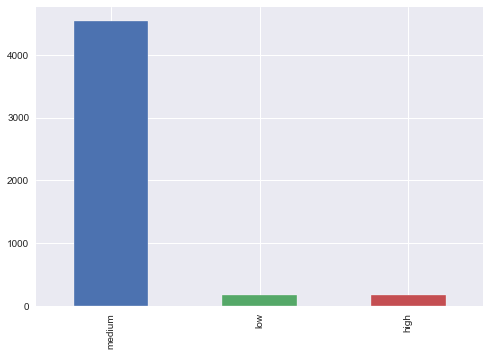

[('medium', 2198), ('low', 1640), ('high', 1060)]
[44.88, 33.48, 21.64]


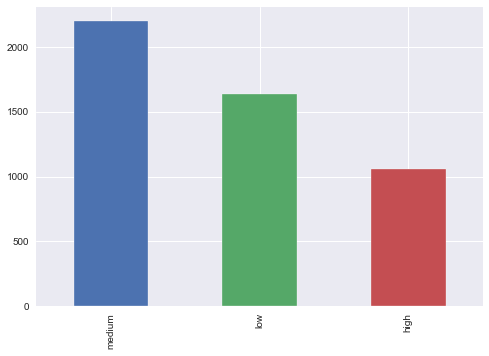

In [239]:
# get histograms of new columns

fig, ax = plt.subplots()
print(proportions_unbalanced)
sum_1 = np.sum([val[1] for val in proportions_unbalanced])
proportions_unbalanced_percent = [ round(val[1] / sum_1 * 100, 2) for val in proportions_unbalanced]
print(proportions_unbalanced_percent)
wine_data['quality_unbalanced_mapping'].value_counts().plot(kind='bar')
plt.xticks([0, 1, 2], ['medium', 'low', 'high'])
save_plot(plt, 'quality_unbalanced_mapping')
plt.show()

print(proportions_balanced)
sum_1 = np.sum([val[1] for val in proportions_balanced])
proportions_balanced_percent = [ round(val[1] / sum_1 * 100, 2) for val in proportions_balanced]
print(proportions_balanced_percent)
wine_data['quality_balanced_mapping'].value_counts().plot(kind='bar')
plt.xticks([0, 1, 2], ['medium', 'low', 'high'])
save_plot(plt, 'quality_balanced_mapping')
plt.show()

In [50]:
print(wine_data.columns)
print(wine_data.columns.tolist())
print(X_test_std[:10, :])

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_unbalanced_mapping',
       'quality_balanced_mapping'],
      dtype='object')
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'quality_unbalanced_mapping', 'quality_balanced_mapping']
[[ 0.53767494  0.42217638  0.13966877 -0.99673552  0.18144122 -1.61137468
   0.57474925 -0.5423458   0.34701894 -0.61447065  0.15791531]
 [ 0.1786911   0.32226478 -0.60920803  0.20270488  1.03755758 -0.43672348
   0.50419802  0.46909587 -0.38385823 -0.26417331 -0.57461468]
 [ 0.89665878 -1.37623245  3.38480157 -0.95675417 -0.26914633 -0.49545604
  -0.83627536 -0.82937654 -0.7825185  -0.78961932  0.23930753]
 [-2.21453451  0.12244158  1.7206309  -0.13713656 -0.4944

In [244]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(conf_matrix, output_filename, labels, extension='svg'):
    fig, ax = plt.subplots(figsize=(10,8))
    sns.heatmap(conf_matrix, annot=True, center=True, ax = ax, annot_kws={'size': 15}); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Przewidywana klasa');ax.set_ylabel('Klasa rzeczywista'); 
    # ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

    save_plot(plt, 'confusion_matrix_{}'.format(output_filename), extension)
    plt.show()
    
def plot_and_get_confusion_matrix(y_test, predictions, output_filename, extension='svg'):
    labels = unique_labels(y_test, predictions)
    if len(labels) == 3:
        labels = ['low', 'medium', 'high']
    conf_matrix = confusion_matrix(y_test, predictions)
    plot_confusion_matrix(conf_matrix, output_filename=output_filename, labels=labels, extension=extension)
    return conf_matrix, labels

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

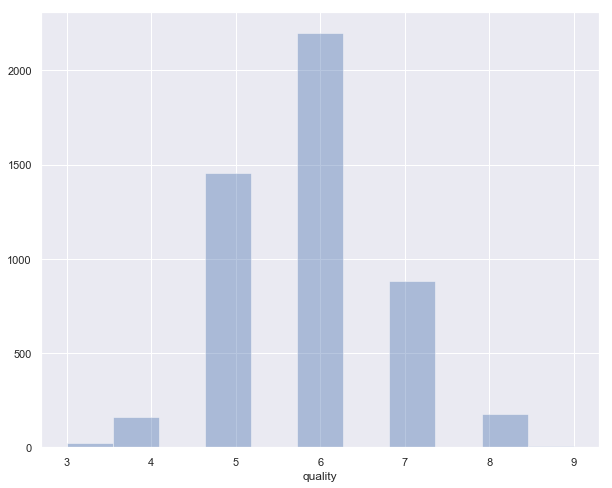

In [52]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(wine_data['quality'], bins=11, kde=False, ax=ax)
save_plot(plt, 'histogram_quality_{}'.format(dataset_name.split('.')[0]))
wine_data['quality'].describe()

In [53]:
counts = wine_data.groupby('quality').count()
print(counts)
counts['quality_c'].values
total = np.sum(counts['quality_c'].values)
first_tier = counts['quality_c'].values[:3]
second_tier = counts['quality_c'].values[3:4]
third_tier = counts['quality_c'].values[4:]

print(np.sum(first_tier)/total, np.sum(second_tier)/total, np.sum(third_tier)/total)
print(wine_data.head())

         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3                   20                20           20              20   
4                  163               163          163             163   
5                 1457              1457         1457            1457   
6                 2198              2198         2198            2198   
7                  880               880          880             880   
8                  175               175          175             175   
9                    5                 5            5               5   

         chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
quality                                                                        
3               20                   20                    20       20    20   
4              163                  163                   163      163   163   
5             1457    

KeyError: 'quality_c'

In [55]:
# summarize data
unique_quality_values = wine_data['quality'].value_counts()
unique_quality_keys = unique_quality_values.keys()
print(unique_quality_keys)

Int64Index([6, 5, 7, 8, 4, 3, 9], dtype='int64')


In [56]:
subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']
rs = round(wine_data[subset_attributes].describe(),2)

rs

,residual sugar,total sulfur dioxide,sulphates,alcohol,volatile acidity,quality
count,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00
mean,6.39,138.36,0.49,10.51,0.28,5.88
std,5.07,42.50,0.11,1.23,0.10,0.89
min,0.60,9.00,0.22,8.00,0.08,3.00
25%,1.70,108.00,0.41,9.50,0.21,5.00
50%,5.20,134.00,0.47,10.40,0.26,6.00
75%,9.90,167.00,0.55,11.40,0.32,6.00
max,65.80,440.00,1.08,14.20,1.10,9.00


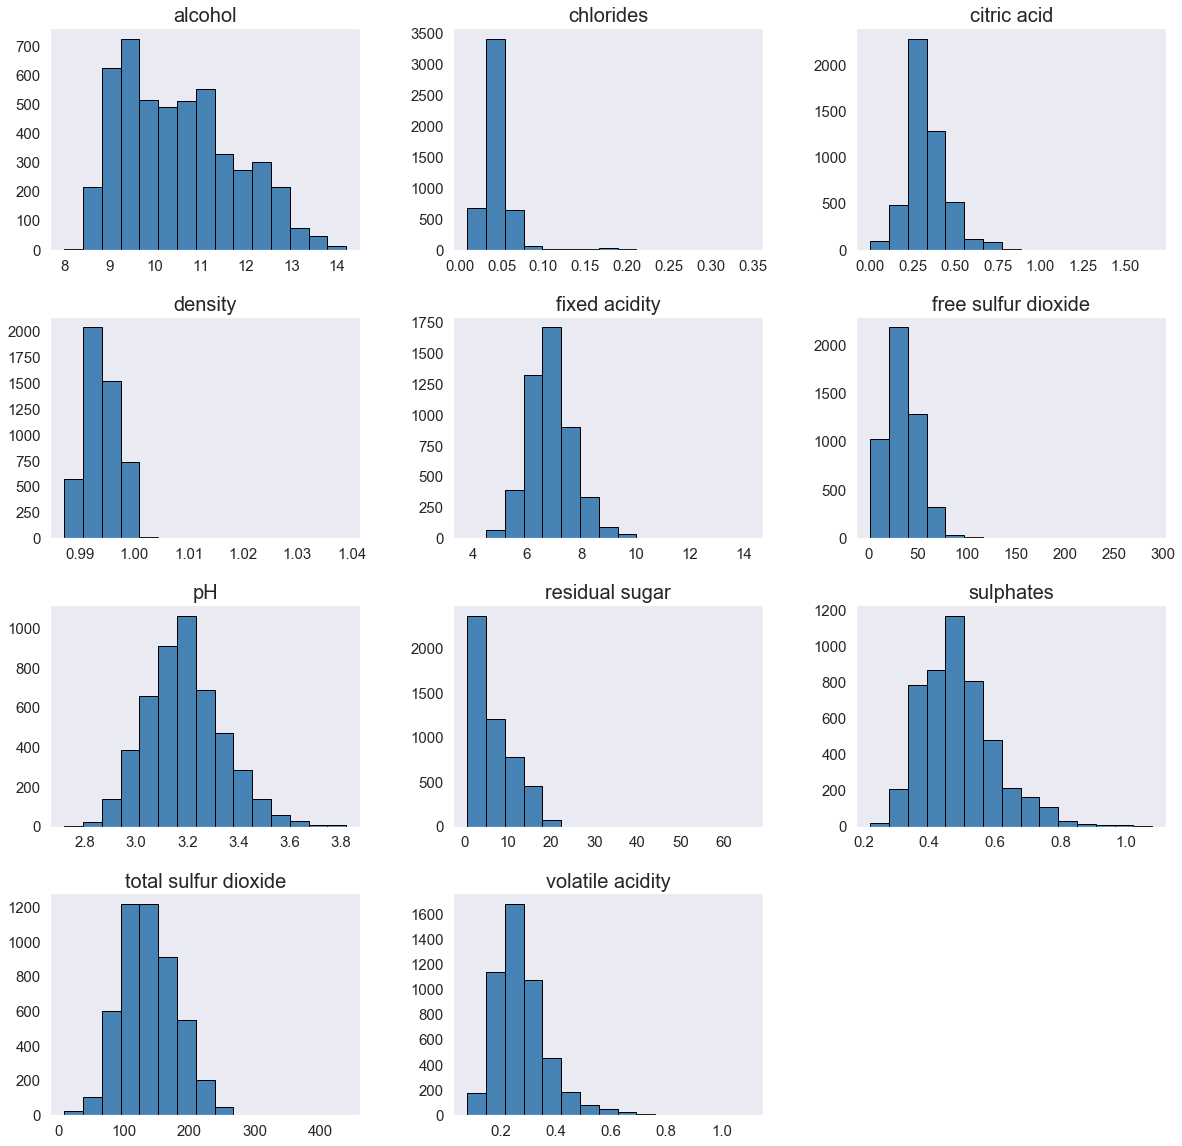

In [58]:
import matplotlib

params = {'axes.titlesize':'20',
          'xtick.labelsize':'10',
          'ytick.labelsize':'10'}
matplotlib.rcParams.update(params)

subset_attributes = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
# fig, ax = plt.subplots(figsize=(6,6))
wine_data[subset_attributes].hist(bins=15, color='steelblue', figsize=(20,20), edgecolor='black', linewidth=1.0,
              xlabelsize=15, ylabelsize=15, grid=False)  

save_plot(plt, 'white_wine_histograms')
plt.show()


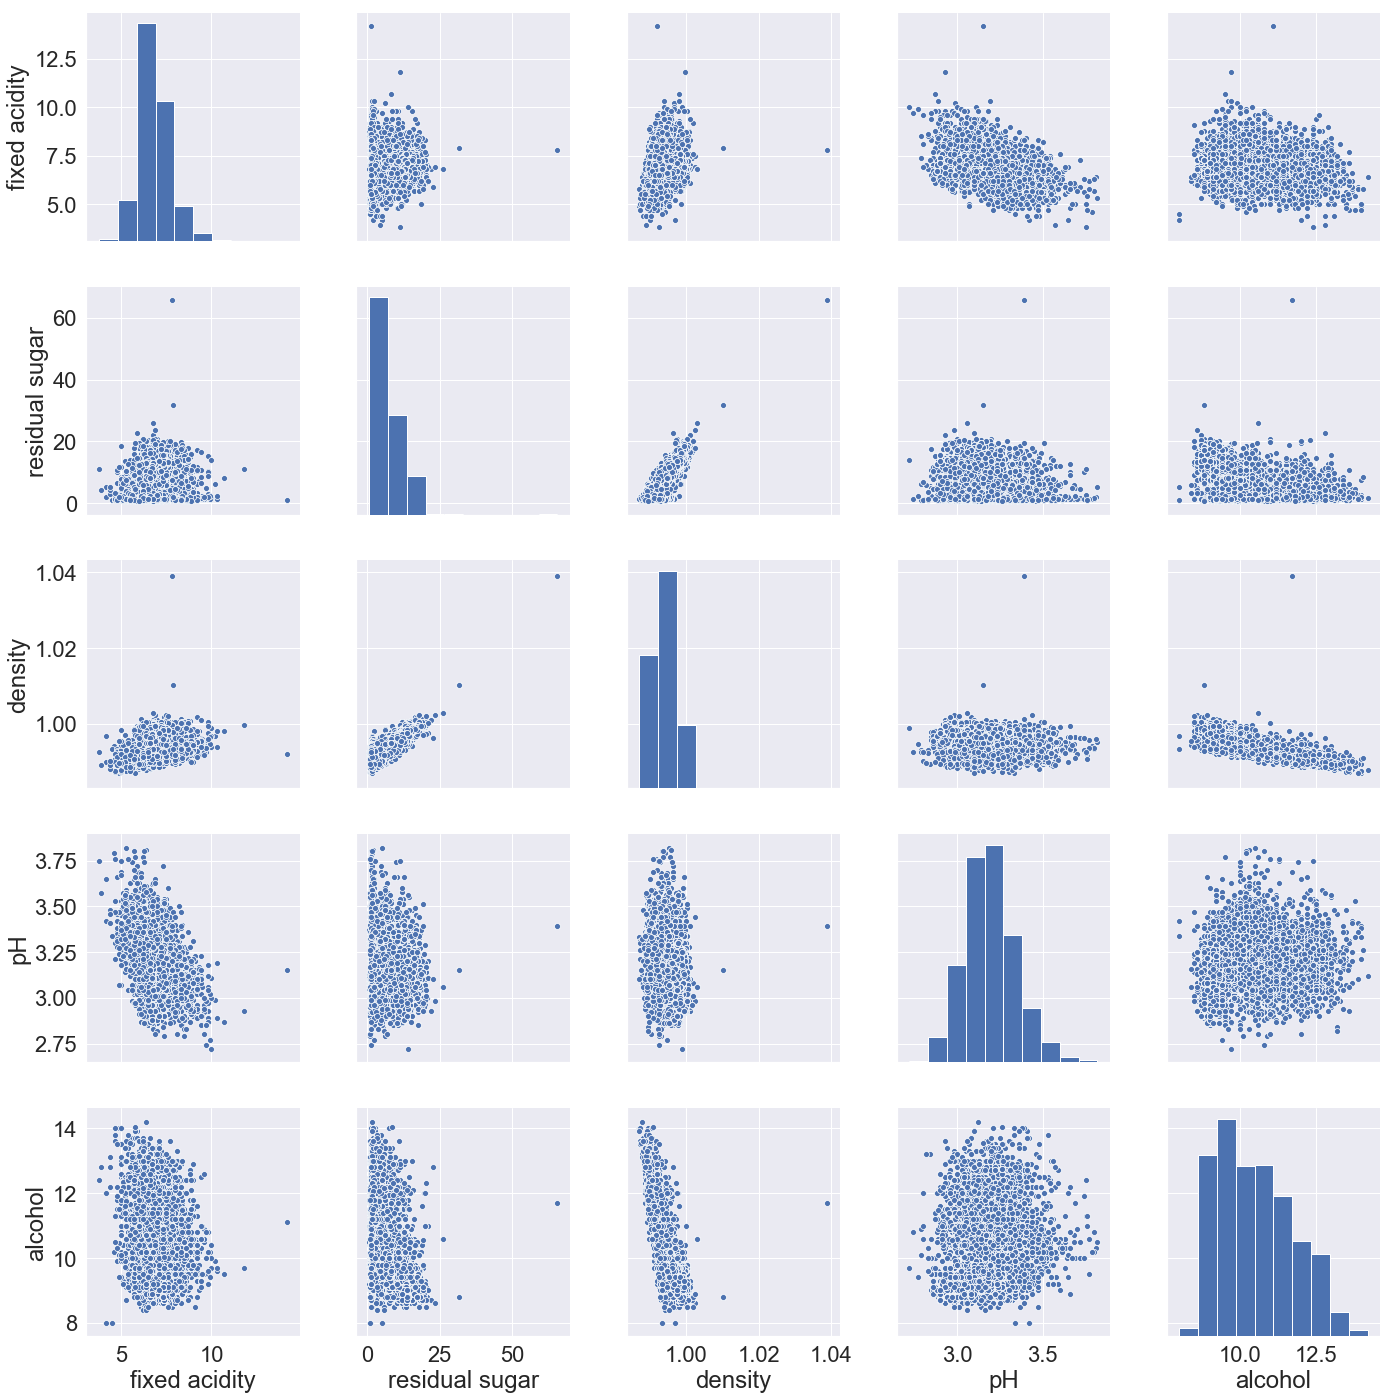

In [59]:
# cols = ['fixed acidity', 'residual sugar', 'chlorides', 'pH', 'sulphates', 'alcohol']
cols = ['fixed acidity', 'residual sugar', 'density', 'pH', 'alcohol']

sns.set(style='whitegrid', context='notebook')
sns.set(font_scale=2)
sns.pairplot(wine_data[cols], height = 4)
save_plot(plt, 'variance_analysis', 'png')
plt.show()


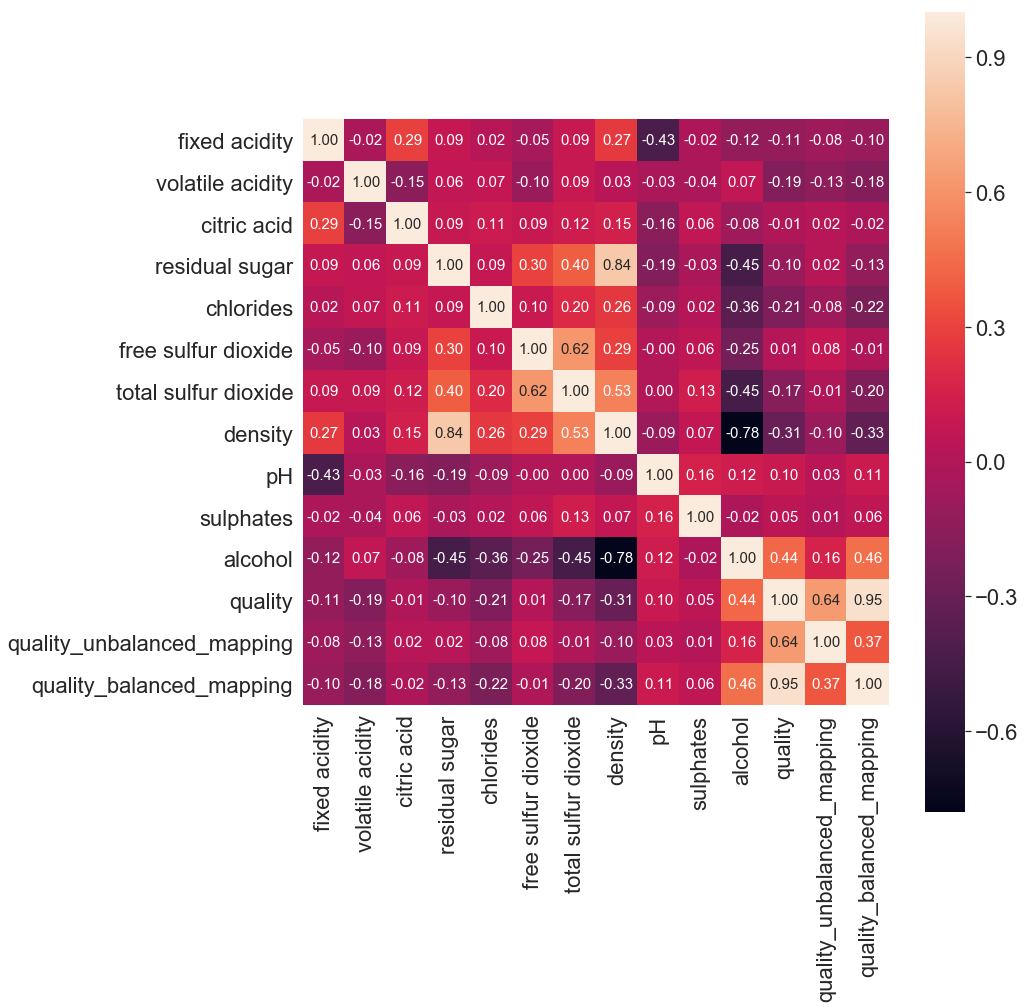

In [63]:
#['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#       'pH', 'sulphates', 'alcohol', 'quality']
# sulphates - siarczany
# volatile acidity - kwas octowy -
# chlorides
# pH
# alcohol
# 
cols = wine_data.columns.tolist()
cm = np.corrcoef(wine_data.values.T) # Return Pearson product-moment correlation coefficients.
fig, ax = plt.subplots(figsize=(15, 15))
sns.set(font_scale=2)
heat_map = sns.heatmap(cm,
                       ax=ax,
                       cbar=True,
                       annot=True,
                       square=True,
                       fmt='.2f',
                       annot_kws={'size': 15},
                       yticklabels=cols,
                       xticklabels=cols)
plt.tight_layout()
save_plot(plt, 'correlation_heat_map')
plt.show()

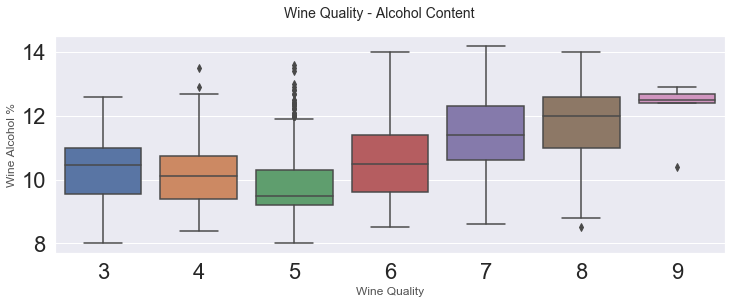

In [65]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", data=wine_data,  ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)
save_plot(plt, 'wine_quality_to_alcohol')

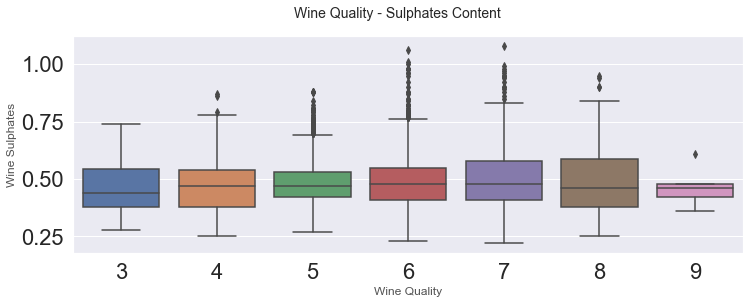

In [66]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Sulphates Content', fontsize=14)

sns.boxplot(x="quality", y="sulphates", data=wine_data,  ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Sulphates",size = 12,alpha=0.8)
save_plot(plt, 'wine_quality_to_sulphates')

Text(0.5,0,'Density')

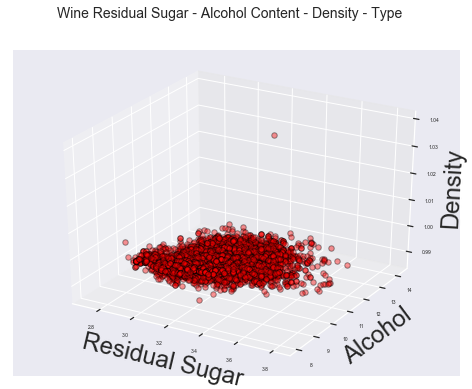

In [69]:
params = {'axes.titlesize':'20',
          'xtick.labelsize':'5',
          'ytick.labelsize':'5'}
matplotlib.rcParams.update(params)

fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Density - Type', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(wine_data['pH'])
ys = list(wine_data['alcohol'])
zs = list(wine_data['density'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

for data in data_points:
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c='red', edgecolors='none', s=30)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Density')

c:\python\python35\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


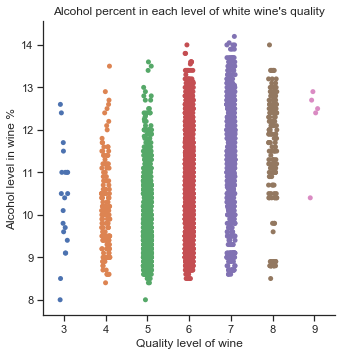

In [70]:
params = {'axes.titlesize':'15',
          'xtick.labelsize':'1',
          'ytick.labelsize':'1'}
matplotlib.rcParams.update(params)
sns.set(style="ticks")
sns.factorplot(x="quality", y="alcohol", data=wine_data, kind="strip")
plt.xlabel("Quality level of wine")
plt.ylabel("Alcohol level in wine %")
plt.title("Alcohol percent in each level of white wine's quality")
save_plot(plt, 'alcohol_to_quality')
plt.show()

Eigen values [3.25643245 0.01487505 1.55282381 0.28683397 0.41475547 0.6056078
 1.21992249 0.72569937 0.91982625 0.97151408 1.03420528].


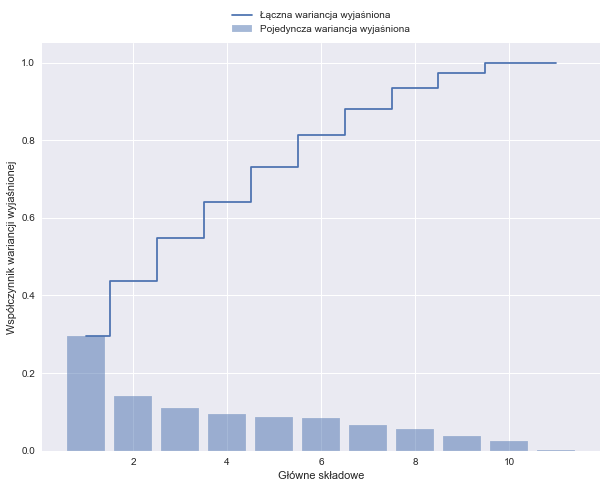

In [266]:
# create covariance matrix
covariance_matrix = np.cov(X_train_std.T)
eigen_vals, eigen_vec = np.linalg.eig(covariance_matrix)
print('Eigen values {}.'.format(eigen_vals))

# wyres wariancji wyjaśnionej
sum = np.sum(eigen_vals)
var_exp = [i / sum for i in sorted(eigen_vals, reverse=True)]
cummulated_variance_explained = np.cumsum(var_exp)

# draw cummulated_variance_explained
fig = plt.figure(figsize=(10, 7.5))
plt.bar(range(1, eigen_vec.shape[0]+1), var_exp, alpha=.5, align='center',
        label='Pojedyncza wariancja wyjaśniona')
plt.step(range(1, eigen_vec.shape[0]+1), cummulated_variance_explained,
         where='mid', label='Łączna wariancja wyjaśniona')
plt.ylabel('Współczynnik wariancji wyjaśnionej')
plt.xlabel('Główne składowe')
# bbox_to_anchor is relative to plot box <0,1>
plt.legend(loc='lower center', bbox_to_anchor=(.5, 1))
save_plot(plt, 'cummulated_variance_explained', 'png')
plt.show()

In [270]:
# transforming features
# create eigen vals, eigen vector value, sort by the value from eigen vals descending
normalized = np.abs(eigen_vals)
normalized = normalized / np.sum(normalized)
eigen_pairs = sorted([(np.abs(eigen_vals[i]), eigen_vec[:, i], normalized[i], i)
               for i in range(len(eigen_vals))], key=lambda k:k[0], reverse=True)
# take all values from vector
# number_of_eigen_vectors_to_take = unique_quality_keys.shape[0]
percent_of_cumulated_variance_needed = 0.7
i = 0
sum_ = 0
indices_taken = []
for _, _, normalized_val, index in eigen_pairs:
    if sum_ > percent_of_cumulated_variance_needed:
        break
    sum_+=normalized_val
    i+=1
    indices_taken.append(index)
    
number_of_eigen_vectors_to_take = i
print('taking first', i, 'components, cumulative variance is', sum_, 'indices taken', indices_taken)

# take n eigen vectors that have the biggest impact
w = np.array(eigen_pairs[0][1][:, np.newaxis])
for i in range(number_of_eigen_vectors_to_take-1):
    w = np.hstack((w, eigen_pairs[i+1][1][:, np.newaxis]))
print('Transforming matrix:\n', w, '\nshape',w.shape)

# x' = xW
print('transforming the first sample from training set\n{}'.format(X_train_std[0]),
      '\nto\n',
      '{}'.format(X_train_std[0].dot(w)))
X_train_pca = X_train_std.dot(w)
X_test_pca = X_test_std.dot(w)

# colors = ['']
# for col in range(number_of_eigen_vectors_to_take):
#     colors.append((random.random(), random.random(), random.random()))

# markers = ['s', 'x', 'o', 'D', '<', '>', '.', 'a', 'p', 'd']

# fig, ax = plt.subplots(figsize=(20,20))
# axis = fig.add_subplot(111, projection='3d')
# # take only those `quality` values that are non-zero
# values = sorted(unique_quality_keys)

# import matplotlib as mpl
# mpl.style.use('seaborn')

# # for l, c in zip(values, colors):
# for l, m in zip(values, markers):
#     axis.scatter(X_train_pca[y_train==l, 0],
#                 X_train_pca[y_train==l, 1],
#                 X_train_pca[y_train==l, 2],
#                 label=l, marker=m)
# axis.set_xlabel('X Label')
# axis.set_ylabel('Y Label')
# axis.set_zlabel('Z Label')
# axis.set_xlim([-6,2])
# axis.set_ylim([-2, 6])
# axis.set_zlim([-6,4])

# plt.legend(loc='lower left')
# save_plot(plt, 'pca_decomposition_{}'.format(number_of_eigen_vectors_to_take))
# plt.show()


taking first 5 components, cumulative variance is 0.7302795740943919 indices taken [0, 2, 6, 10, 9]
Transforming matrix:
 [[-0.15466803 -0.59116767 -0.13069423 -0.06755985  0.22453952]
 [-0.00159546  0.05432162  0.55491222 -0.46966252  0.56293063]
 [-0.13684048 -0.34959953 -0.50400607 -0.17794102 -0.03375473]
 [-0.42578538  0.00522937  0.19876517  0.28382024  0.05302704]
 [-0.21078041 -0.00450681  0.1235071  -0.63221572 -0.4670183 ]
 [-0.30413527  0.28530959 -0.27624338  0.19132845  0.30798595]
 [-0.40838057  0.23456075 -0.13133954 -0.05516292  0.33153714]
 [-0.51219728  0.00651596  0.11691325  0.0775487  -0.11225246]
 [ 0.12575439  0.58563329 -0.13810329 -0.04156385 -0.17534595]
 [-0.0394914   0.21050385 -0.47246259 -0.46311751  0.18920256]
 [ 0.43890276 -0.03951545 -0.1291709   0.03271746  0.35597348]] 
shape (11, 5)
transforming the first sample from training set
[-0.06063146 -0.97658604 -0.2763739   1.28220125  0.72214629 -0.96531652
  0.76288586  1.38486062 -1.24762216  0.2612727 

In [211]:
# def plot_decision_regions(x, y, classifier, test_idx=None, resolution=.02):
#     markers = ('s', 'x', 'o', '^', 'v', '+', 'p', 'd', 'X')
#     colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan', 'yellow', 'violet', 'brown')
#     cmap = ListedColormap(colors[:len(np.unique(y))])
    
#     x1_min, x1_max = X[:,]

In [ ]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(wine_data['alcohol'], bins=11, kde=False, ax=ax)
save_plot(plt, 'alcohol_histogram')

sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(X_train[:, 9], bins=11, kde=False, ax=ax)
plt.show()

In [164]:
def plot_decision_function(X, y, classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    temp = np.c_[xx.ravel(), yy.ravel()]
    Z = classifier.decision_function(temp)
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(X[:, 0], X[:, 1], c=y, s=100 * sample_weight, alpha=0.9,
                 cmap=plt.cm.bone, edgecolors='black')

    axis.axis('off')
    axis.set_title(title)

In [226]:
# restricted to binary classification
def plot_roc(classifier, x_test, y_test, classifier_name):
    from sklearn.metrics import roc_curve, auc
    print(y_test.shape, y_test[4])
    predictions = classifier.predict_proba(x_test)[:, 1]
    frp, tpr, threshold = roc_curve(y_test, predictions)
#     score = classifier.score(x_test, y_test)
#     fpr, tpr, thresholds = roc_curve(predictions, score, pos_label=len(np.unique(y_test)))
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC dla {}'.format(classifier_name))
    plt.legend(loc="lower right")
    save_plot(plt, 'roc_{}'.format(classifier_name))
    plt.show()

In [280]:
def rate_classifier(classifier, x_test, y_test, method_name):
    from sklearn.metrics import roc_auc_score
    
    predictions = classifier.predict(x_test)
    # print the confusion matrix and accuracy of the model
    conf_matrix = plot_and_get_confusion_matrix(y_test, predictions, output_filename=method_name)
    print('Confusion Matrix:\n', conf_matrix[0])
    print('Accuracy:', accuracy_score(y_test, predictions))
    print('Score', str(classifier.score(x_test, y_test)))
    precision, recall, f1, support = precision_recall_fscore_support(y_test, predictions)
    print('precision', precision)
    print('recall', recall)
    print('f1', f1)
    print('support', support)
    mse = mean_squared_error(predictions, y_test)
    print('MSE:',mse ** 0.5)
    print()

# drzewa decyzyjne

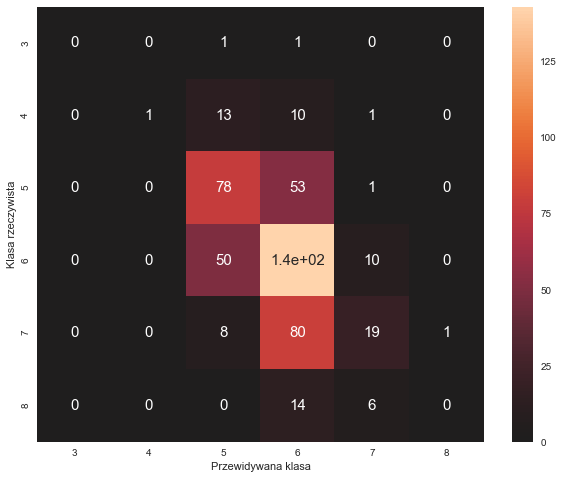

Confusion Matrix:
 [[  0   0   1   1   0   0]
 [  0   1  13  10   1   0]
 [  0   0  78  53   1   0]
 [  0   0  50 143  10   0]
 [  0   0   8  80  19   1]
 [  0   0   0  14   6   0]]
Accuracy: 0.49183673469387756
Score 0.49183673469387756
precision [0.         1.         0.52       0.47508306 0.51351351 0.        ]
recall [0.         0.04       0.59090909 0.7044335  0.17592593 0.        ]
f1 [0.         0.07692308 0.55319149 0.56746032 0.26206897 0.        ]
support [  2  25 132 203 108  20]
MSE: 0.865436070334912



c:\python\python35\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


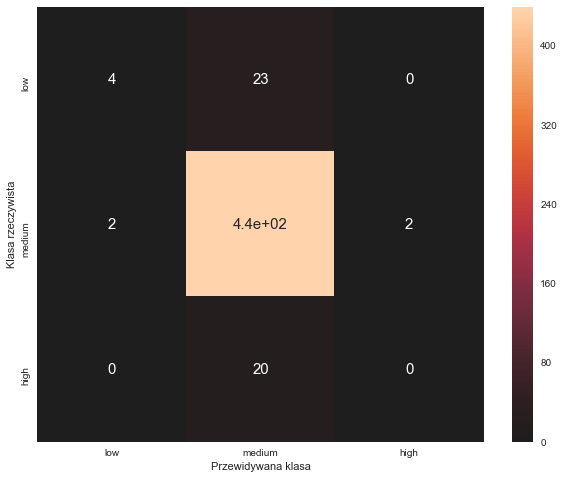

Confusion Matrix:
 [[  4  23   0]
 [  2 439   2]
 [  0  20   0]]
Accuracy: 0.9040816326530612
Score 0.9040816326530612
precision [0.66666667 0.91078838 0.        ]
recall [0.14814815 0.99097065 0.        ]
f1 [0.24242424 0.94918919 0.        ]
support [ 27 443  20]
MSE: 0.30970690555255426



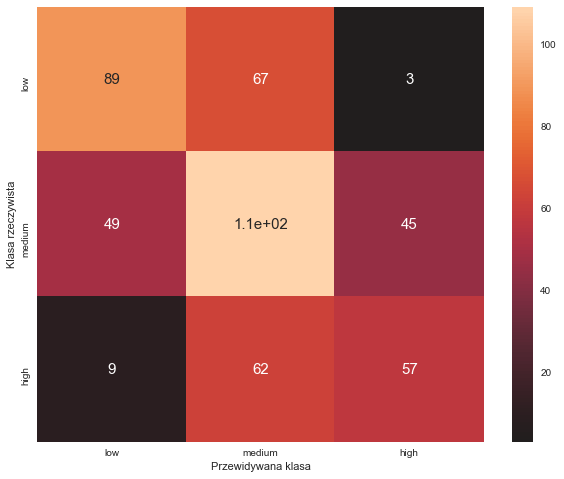

Confusion Matrix:
 [[ 89  67   3]
 [ 49 109  45]
 [  9  62  57]]
Accuracy: 0.5204081632653061
Score 0.5204081632653061
precision [0.60544218 0.45798319 0.54285714]
recall [0.55974843 0.53694581 0.4453125 ]
f1 [0.58169935 0.49433107 0.48927039]
support [159 203 128]
MSE: 0.7436808619897354



In [306]:
# random tree
from sklearn.tree import DecisionTreeClassifier
def decision_tree(depth, export_tree=True, y_index=0, method_name='tree', use_pca=False):
    if use_pca:
        x_training = X_train_pca
        x_testing = X_test_pca
    else:
        x_training = X_train
        x_testing = X_test
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0)
    tree.fit(x_training, y_train[:, y_index])
    rate_classifier(tree, x_testing, y_test[:, y_index], 'tree_y_{}_{}'.format(y_index, depth))
    if export_tree:
        # export file to graphviz
        export_graphviz(tree, out_file='{}_depth_{}_y_index_{}{}.dot'.\
                        format(method_name, depth, y_index, '' if not use_pca else '_pca'), 
                        feature_names=wine_data.columns.tolist()[:-y_train.shape[1]] if not use_pca else None)
#     plot_roc(tree, X_test, y_test[:, 0], 'decision_tree')

# decision_tree(2, y_index=0, use_pca=True)
# decision_tree(2, y_index=1, use_pca=True)
# decision_tree(2, y_index=2, use_pca=True)

# decision_tree(3, y_index=0)
# decision_tree(3, y_index=1)
# decision_tree(3, y_index=2)

for i in range(5, 6):
    decision_tree(i, y_index=0, export_tree=False)
    decision_tree(i, y_index=1, export_tree=False)
    decision_tree(i, y_index=2, export_tree=False)

# Random forest

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'quality_unbalanced_mapping', 'quality_balanced_mapping']


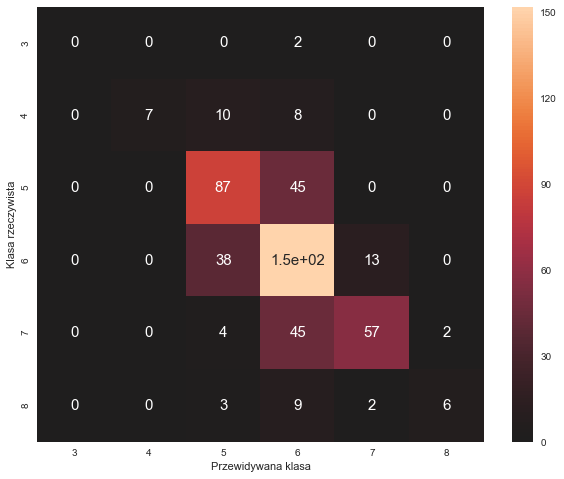

Confusion Matrix:
 [[  0   0   0   2   0   0]
 [  0   7  10   8   0   0]
 [  0   0  87  45   0   0]
 [  0   0  38 152  13   0]
 [  0   0   4  45  57   2]
 [  0   0   3   9   2   6]]
Accuracy: 0.6306122448979592
Score 0.6306122448979592
precision [0.         1.         0.61267606 0.58237548 0.79166667 0.75      ]
recall [0.         0.28       0.65909091 0.74876847 0.52777778 0.3       ]
f1 [0.         0.4375     0.6350365  0.65517241 0.63333333 0.42857143]
support [  2  25 132 203 108  20]
MSE: 0.761309291112813


Importance of predictors:
[('alcohol', 0.12956102257027755), ('volatile acidity', 0.10068659428051778), ('density', 0.09874545761955036), ('free sulfur dioxide', 0.09173224673660478), ('pH', 0.08656264026322433), ('total sulfur dioxide', 0.08634165941635302), ('chlorides', 0.08319300319527943), ('residual sugar', 0.08168238548037789), ('citric acid', 0.08117906522769228), ('sulphates', 0.08082386463731746), ('fixed acidity', 0.07949206057280514)]


c:\python\python35\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python35\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


100 (100,)


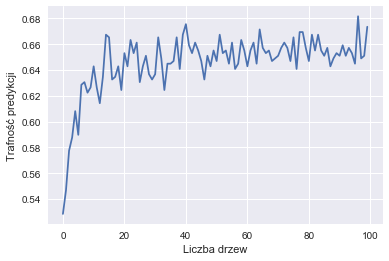

[0.52857143 0.54693878 0.57755102 0.5877551  0.60816327 0.58979592
 0.62857143 0.63061224 0.62244898 0.62653061 0.64285714 0.62653061
 0.61428571 0.63469388 0.66734694 0.66530612 0.63265306 0.63469388
 0.64285714 0.6244898  0.65306122 0.64285714 0.66326531 0.65306122
 0.66122449 0.63061224 0.64285714 0.65102041 0.63673469 0.63265306
 0.63673469 0.66530612 0.64897959 0.6244898  0.64489796 0.64489796
 0.64693878 0.66530612 0.64081633 0.66734694 0.6755102  0.65918367
 0.65306122 0.66122449 0.65510204 0.64693878 0.63265306 0.65102041
 0.64285714 0.65510204 0.64693878 0.66734694 0.65306122 0.65510204
 0.64489796 0.66122449 0.64081633 0.64489796 0.66326531 0.65510204
 0.64285714 0.65510204 0.66122449 0.64489796 0.67142857 0.65714286
 0.65306122 0.65510204 0.64693878 0.64897959 0.65102041 0.65714286
 0.66122449 0.65714286 0.64693878 0.66530612 0.64081633 0.66938776
 0.66938776 0.65714286 0.64693878 0.66734694 0.65510204 0.66734694
 0.65510204 0.65102041 0.65714286 0.64285714 0.64897959 0.6530

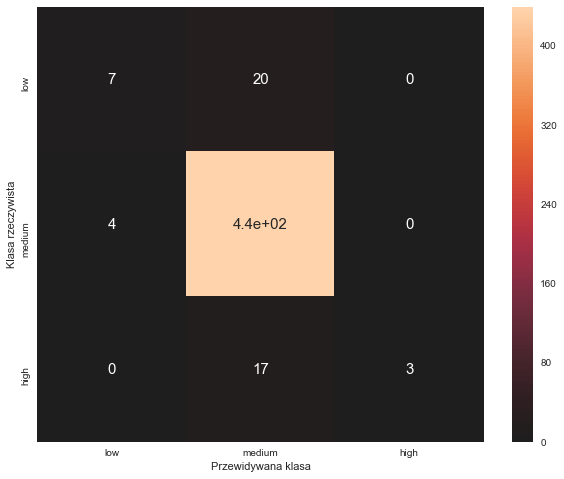

Confusion Matrix:
 [[  7  20   0]
 [  4 439   0]
 [  0  17   3]]
Accuracy: 0.9163265306122449
Score 0.9163265306122449
precision [0.63636364 0.92226891 1.        ]
recall [0.25925926 0.99097065 0.15      ]
f1 [0.36842105 0.95538629 0.26086957]
support [ 27 443  20]
MSE: 0.289263667590237


Importance of predictors:
[('free sulfur dioxide', 0.11316242717908072), ('volatile acidity', 0.10935587907861159), ('alcohol', 0.09877053329896748), ('citric acid', 0.09072036104012625), ('residual sugar', 0.08797419973963194), ('fixed acidity', 0.08733659441063345), ('total sulfur dioxide', 0.08722102608054368), ('pH', 0.08277774150748074), ('density', 0.0826033717316654), ('sulphates', 0.08129654103774653), ('chlorides', 0.07878132489551225)]


c:\python\python35\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


100 (100,)


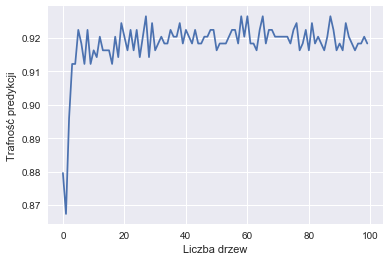

[0.87959184 0.86734694 0.89591837 0.9122449  0.9122449  0.92244898
 0.91836735 0.9122449  0.92244898 0.9122449  0.91632653 0.91428571
 0.92040816 0.91632653 0.91632653 0.91632653 0.9122449  0.92040816
 0.91428571 0.9244898  0.92040816 0.91632653 0.92244898 0.91632653
 0.92244898 0.91428571 0.92040816 0.92653061 0.91428571 0.9244898
 0.91632653 0.91836735 0.92040816 0.91836735 0.91836735 0.92244898
 0.92040816 0.92040816 0.9244898  0.91836735 0.92244898 0.92040816
 0.91836735 0.92244898 0.91836735 0.91836735 0.92040816 0.92040816
 0.92244898 0.92244898 0.91632653 0.91836735 0.91836735 0.91836735
 0.92040816 0.92244898 0.92244898 0.91836735 0.92653061 0.92040816
 0.92653061 0.91836735 0.91836735 0.91632653 0.92244898 0.92653061
 0.91836735 0.92244898 0.92244898 0.92040816 0.92040816 0.92040816
 0.92040816 0.92040816 0.91836735 0.92244898 0.9244898  0.91632653
 0.91836735 0.92244898 0.91632653 0.9244898  0.91836735 0.92040816
 0.91836735 0.91632653 0.92040816 0.92653061 0.92244898 0.91632

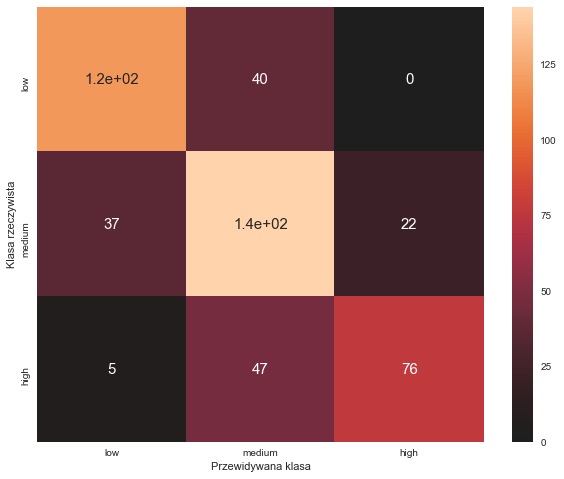

Confusion Matrix:
 [[119  40   0]
 [ 37 144  22]
 [  5  47  76]]
Accuracy: 0.6918367346938775
Score 0.6918367346938775
precision [0.73913043 0.62337662 0.7755102 ]
recall [0.74842767 0.70935961 0.59375   ]
f1 [0.74375    0.66359447 0.67256637]
support [159 203 128]
MSE: 0.5820442510703818


Importance of predictors:
[('alcohol', 0.1304466783428245), ('volatile acidity', 0.09915751233133419), ('density', 0.09809153139886687), ('chlorides', 0.08986747436184636), ('total sulfur dioxide', 0.08824322728543127), ('free sulfur dioxide', 0.08647643628511821), ('pH', 0.08360917082757566), ('citric acid', 0.08303438880038508), ('residual sugar', 0.08293989546152923), ('sulphates', 0.07937533015154705), ('fixed acidity', 0.07875835475354162)]


c:\python\python35\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


100 (100,)


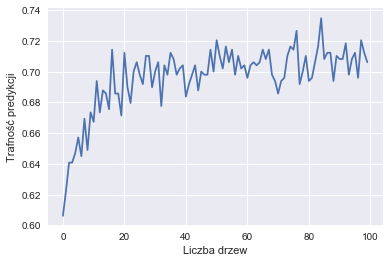

[0.60612245 0.62244898 0.64081633 0.64081633 0.64693878 0.65714286
 0.64489796 0.66938776 0.64897959 0.67346939 0.66734694 0.69387755
 0.67346939 0.6877551  0.68571429 0.6755102  0.71428571 0.68571429
 0.68571429 0.67142857 0.7122449  0.68979592 0.67959184 0.7
 0.70612245 0.69795918 0.69183673 0.71020408 0.71020408 0.68979592
 0.7        0.70612245 0.67755102 0.70408163 0.69795918 0.7122449
 0.70816327 0.69795918 0.70204082 0.70408163 0.68367347 0.69183673
 0.69795918 0.70408163 0.6877551  0.7        0.69795918 0.69795918
 0.71428571 0.7        0.72040816 0.71020408 0.70204082 0.71632653
 0.70612245 0.71428571 0.69795918 0.71020408 0.70204082 0.70408163
 0.69591837 0.70408163 0.70612245 0.70408163 0.70612245 0.71428571
 0.70816327 0.71428571 0.69795918 0.69387755 0.68571429 0.69387755
 0.69591837 0.71020408 0.71632653 0.71428571 0.72653061 0.69183673
 0.7        0.71020408 0.69387755 0.69591837 0.70612245 0.71632653
 0.73469388 0.70816327 0.7122449  0.7122449  0.69387755 0.71020408
 0.

In [283]:
# random forest
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

def random_forest(y_index):
    print(wine_data.columns.tolist())
    predictors = wine_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

    forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0, n_jobs=8)

    random_forest = forest.fit(X_train, y_train[:, y_index])
    rate_classifier(forest, X_test, y_test[:, y_index], 'randomForest_y_{}'.format(y_index))

    # to display the relative importance of each predictive variable
    model = ExtraTreesClassifier()
    model.fit(X_train, y_train[:, y_index])

    print('\nImportance of predictors:')
    dct = dict()
    for c in range(len(predictors.columns)):
        dct[predictors.columns[c]] = model.feature_importances_[c]
    print(sorted(dct.items(), key=operator.itemgetter(1), reverse=True))

    # run different numbers of trees to see the effect of the number on the accuracy of the prediction
    n = 100
    accuracy = np.zeros((n,))

    for i in range(n):
        classifier = RandomForestClassifier(n_estimators=i+1)
        classifier = classifier.fit(X_train, y_train[:, y_index])
        predictions = classifier.predict(X_test)
        accuracy[i] = accuracy_score(y_test[:, y_index], predictions)

    print(n, accuracy.shape)
    plt.plot(range(n), accuracy)
    plt.xlabel("Liczba drzew")
    plt.ylabel("Trafność predykcji")
#     plt.title("Zależność liczy drzew w stosunku do trafności predykcji.")
    save_plot(plt, 'random_forest_y_{}'.format(y_index))
    plt.show()


    print(accuracy)
#     export_graphviz(forest, out_file='random_forest_y_index{}.dot'.format(y_index), feature_names=wine_data.columns.tolist()[:-1])

random_forest(0)
random_forest(1)
random_forest(2)

# Naive Bayes

y index?  0
Running method <class 'sklearn.naive_bayes.GaussianNB'>


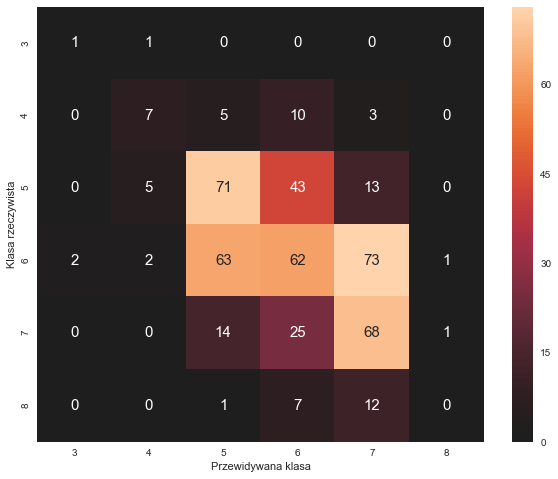

Confusion Matrix:
 [[ 1  1  0  0  0  0]
 [ 0  7  5 10  3  0]
 [ 0  5 71 43 13  0]
 [ 2  2 63 62 73  1]
 [ 0  0 14 25 68  1]
 [ 0  0  1  7 12  0]]
Accuracy: 0.42653061224489797
Score 0.42653061224489797
precision [0.33333333 0.46666667 0.46103896 0.42176871 0.40236686 0.        ]
recall [0.5        0.28       0.53787879 0.30541872 0.62962963 0.        ]
f1 [0.4        0.35       0.4965035  0.35428571 0.49097473 0.        ]
support [  2  25 132 203 108  20]
MSE: 0.9793792286287206

Running method <class 'sklearn.naive_bayes.BernoulliNB'>


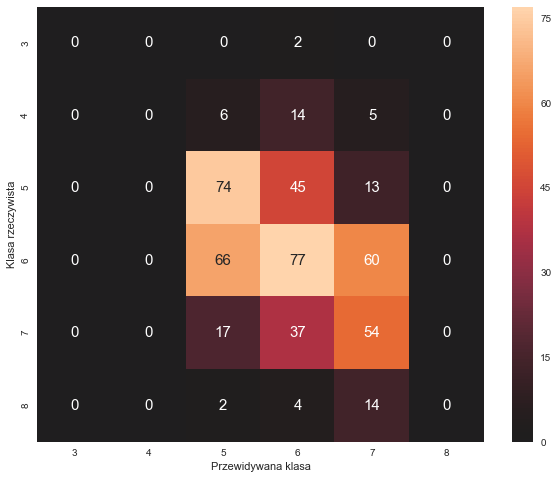

Confusion Matrix:
 [[ 0  0  0  2  0  0]
 [ 0  0  6 14  5  0]
 [ 0  0 74 45 13  0]
 [ 0  0 66 77 60  0]
 [ 0  0 17 37 54  0]
 [ 0  0  2  4 14  0]]
Accuracy: 0.41836734693877553
Score 0.41836734693877553
precision [0.         0.         0.44848485 0.4301676  0.36986301 0.        ]
recall [0.         0.         0.56060606 0.37931034 0.5        0.        ]
f1 [0.         0.         0.4983165  0.40314136 0.42519685 0.        ]
support [  2  25 132 203 108  20]
MSE: 1.0111621925249366



c:\python\python35\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [284]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

def naive(wine_set, y_index, use_pca=False):
    print('y index? ', y_index)

    def execute_naive_bayes(x_tr, x_te, y_tr, y_te, method, method_name='bayes'):
        print('Running method', str(method))
        classifier = method()
        classifier.fit(x_tr, y_tr)
        rate_classifier(classifier, x_te, y_te, 'randomForest_y_{}'.format(y_index))

    
    # split into training and testing sets
    
    if use_pca:
        naive_x_train, naive_x_test, naive_y_train, naive_y_test = X_train_pca, X_test_pca, y_train[:, y_index], y_test[:, y_index]
    else:
        naive_x_train, naive_x_test, naive_y_train, naive_y_test = X_train_std, X_test_std, y_train[:, y_index], y_test[:, y_index]
    execute_naive_bayes(naive_x_train, naive_x_test, naive_y_train, naive_y_test, GaussianNB, 'naive_gaussian_y_{}'.format(y_index))
    execute_naive_bayes(naive_x_train, naive_x_test, naive_y_train, naive_y_test, BernoulliNB, 'naive_bernoulin_y_{}'.format(y_index))
#     execute_naive_bayes(naive_x_train, naive_x_test, naive_y_train, naive_y_test, MultinomialNB, 'naive_mulitnominal')

    
naive(wine_data, 0)

y index?  1
Running method <class 'sklearn.naive_bayes.GaussianNB'>


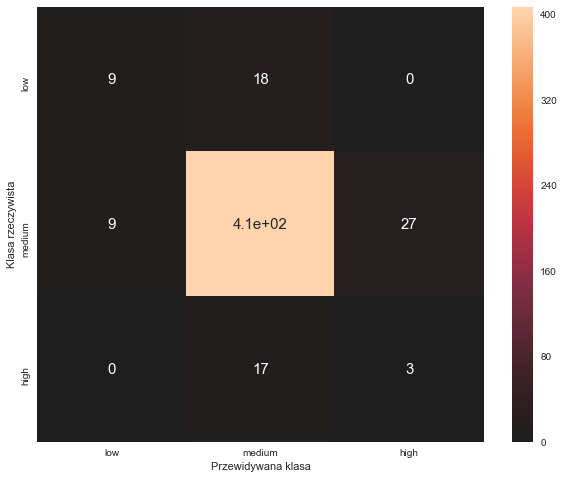

Confusion Matrix:
 [[  9  18   0]
 [  9 407  27]
 [  0  17   3]]
Accuracy: 0.8551020408163266
Score 0.8551020408163266
precision [0.5        0.92081448 0.1       ]
recall [0.33333333 0.91873589 0.15      ]
f1 [0.4        0.91977401 0.12      ]
support [ 27 443  20]
MSE: 0.3806546455564065

Running method <class 'sklearn.naive_bayes.BernoulliNB'>


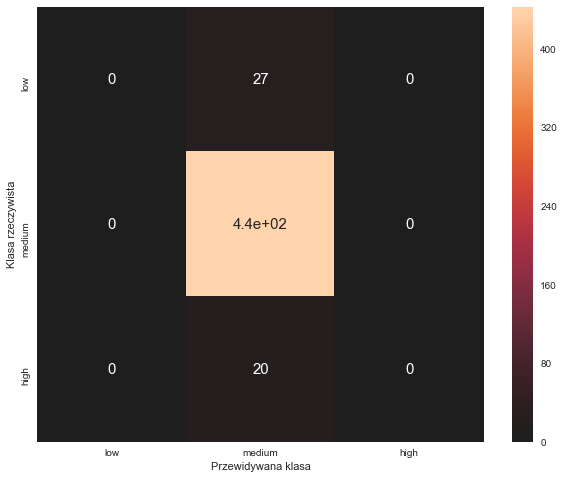

Confusion Matrix:
 [[  0  27   0]
 [  0 443   0]
 [  0  20   0]]
Accuracy: 0.9040816326530612
Score 0.9040816326530612
precision [0.         0.90408163 0.        ]
recall [0. 1. 0.]
f1 [0.         0.94962487 0.        ]
support [ 27 443  20]
MSE: 0.30970690555255426



c:\python\python35\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [285]:
naive(wine_data, 1)

y index?  2
Running method <class 'sklearn.naive_bayes.GaussianNB'>


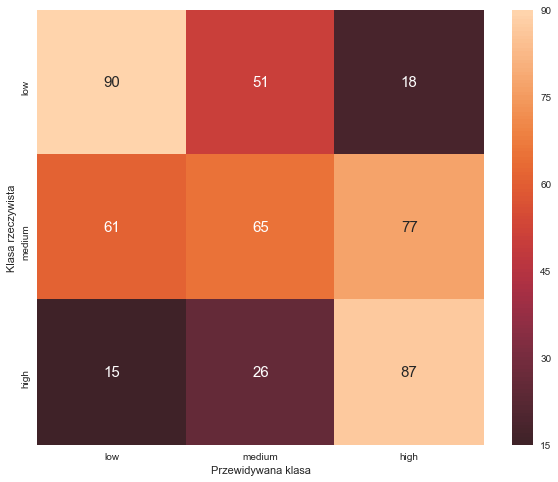

Confusion Matrix:
 [[90 51 18]
 [61 65 77]
 [15 26 87]]
Accuracy: 0.49387755102040815
Score 0.49387755102040815
precision [0.54216867 0.45774648 0.47802198]
recall [0.56603774 0.32019704 0.6796875 ]
f1 [0.55384615 0.37681159 0.56129032]
support [159 203 128]
MSE: 0.8415243700013224

Running method <class 'sklearn.naive_bayes.BernoulliNB'>


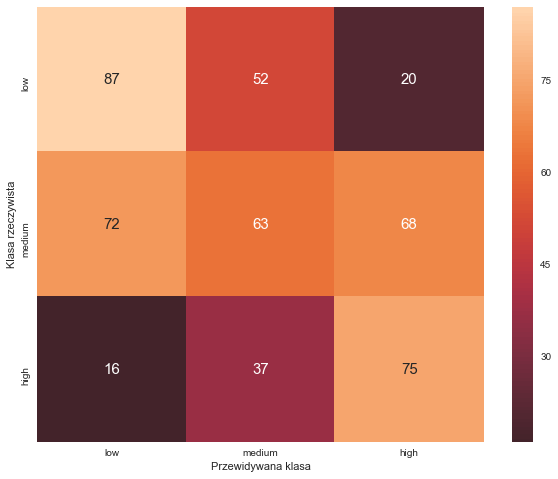

Confusion Matrix:
 [[87 52 20]
 [72 63 68]
 [16 37 75]]
Accuracy: 0.45918367346938777
Score 0.45918367346938777
precision [0.49714286 0.41447368 0.4601227 ]
recall [0.54716981 0.31034483 0.5859375 ]
f1 [0.52095808 0.35492958 0.51546392]
support [159 203 128]
MSE: 0.8724817991201412



In [286]:
naive(wine_data, 2)

In [252]:
def plot_decision_function(X, y, classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    temp = np.c_[xx.ravel(), yy.ravel()]
    print(temp.shape)
    Z = classifier.decision_function(X)
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(X[:, 0], X[:, 1], c=y, s=100 * sample_weight, alpha=0.9,
                 cmap=plt.cm.bone, edgecolors='black')

    axis.axis('off')
    axis.set_title(title)

# support vector classification

y_index is 0


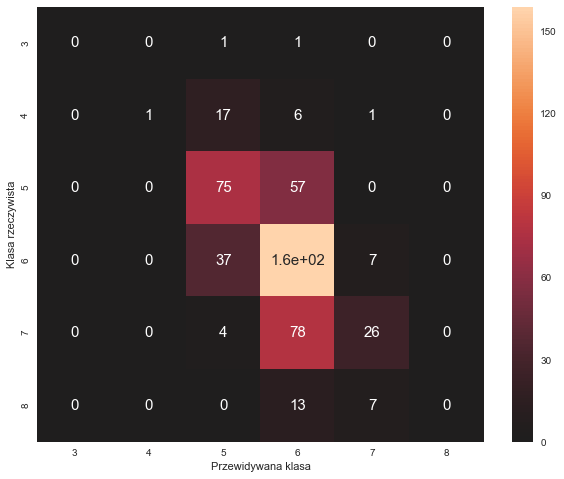

Confusion Matrix:
 [[  0   0   1   1   0   0]
 [  0   1  17   6   1   0]
 [  0   0  75  57   0   0]
 [  0   0  37 159   7   0]
 [  0   0   4  78  26   0]
 [  0   0   0  13   7   0]]
Accuracy: 0.5326530612244897
Score 0.5326530612244897
precision [0.         1.         0.55970149 0.50636943 0.63414634 0.        ]
recall [0.         0.04       0.56818182 0.78325123 0.24074074 0.        ]
f1 [0.         0.07692308 0.56390977 0.61508704 0.34899329 0.        ]
support [  2  25 132 203 108  20]
MSE: 0.8043250434433855



c:\python\python35\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


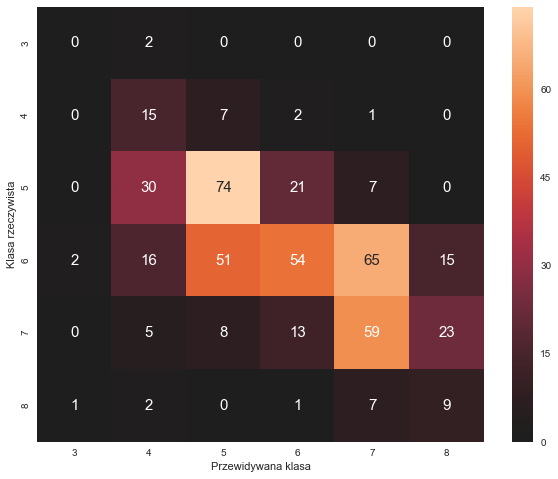

Confusion Matrix:
 [[ 0  2  0  0  0  0]
 [ 0 15  7  2  1  0]
 [ 0 30 74 21  7  0]
 [ 2 16 51 54 65 15]
 [ 0  5  8 13 59 23]
 [ 1  2  0  1  7  9]]
Accuracy: 0.4306122448979592
Score 0.4306122448979592
precision [0.         0.21428571 0.52857143 0.59340659 0.42446043 0.19148936]
recall [0.         0.6        0.56060606 0.26600985 0.5462963  0.45      ]
f1 [0.         0.31578947 0.54411765 0.36734694 0.47773279 0.26865672]
support [  2  25 132 203 108  20]
MSE: 1.0536622236906157



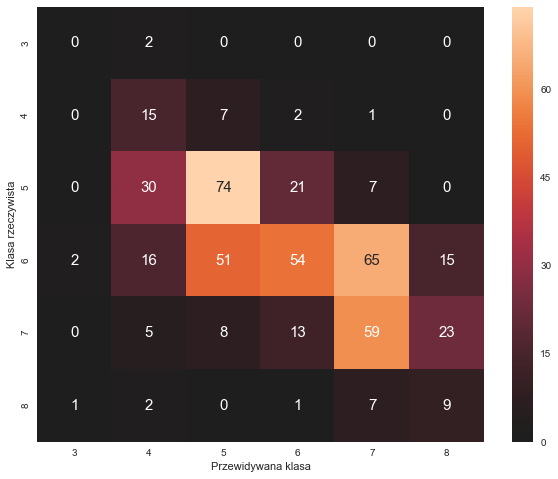

Confusion Matrix:
 [[ 0  2  0  0  0  0]
 [ 0 15  7  2  1  0]
 [ 0 30 74 21  7  0]
 [ 2 16 51 54 65 15]
 [ 0  5  8 13 59 23]
 [ 1  2  0  1  7  9]]
Accuracy: 0.4306122448979592
Score 0.4306122448979592
precision [0.         0.21428571 0.52857143 0.59340659 0.42446043 0.19148936]
recall [0.         0.6        0.56060606 0.26600985 0.5462963  0.45      ]
f1 [0.         0.31578947 0.54411765 0.36734694 0.47773279 0.26865672]
support [  2  25 132 203 108  20]
MSE: 1.0536622236906157



In [291]:
from sklearn import svm
from sklearn.datasets import make_blobs

def run_svm(y_index, weights=None):
    print('y_index is' , y_index)
    
    def run_concrete_svm(x_tr, x_te, y_tr, y_te, classifier, classifier_name, balanced = False, class_weights_=None):
        if balanced:
            if class_weights_ is not None:
                clf = classifier(kernel='rbf', C=1.0, gamma='auto', class_weight=class_weights_)
            else:
                clf = classifier(kernel='rbf', C=1.0, gamma='auto', class_weight='balanced')
        else:
            clf = classifier(kernel='rbf', C=1.0, gamma='auto')
        
        clf.fit(x_tr, y_tr)
        
        rate_classifier(clf, x_te, y_te, '{}_y_{}'.format(classifier_name, y_index))
#         predictions = clf.predict(X=x_te)
#         # print the confusion matrix and accuracy of the model
#         conf_matrix = plot_and_get_confusion_matrix(y_te, predictions, output_filename='{}_y_{}_balanced_{}_auto_weights{}'.format(classifier_name, y_index, balanced, (1 if class_weights_ is None else 0)))
#         print('Confusion Matrix:\n', conf_matrix[0])
#         print('Accuracy:', accuracy_score(y_te, predictions))
#         print('Score', str(clf.score(x_te, y_te)))
#         mse = mean_squared_error(predictions, y_te)
#         print('MSE:',mse ** 0.5)
        
    
    run_concrete_svm(X_train_std, X_test_std, y_train[:, y_index], y_test[:, y_index], svm.SVC, 'svm', balanced=False)
    run_concrete_svm(X_train_std, X_test_std, y_train[:, y_index], y_test[:, y_index], svm.SVC, 'svm_weighted', balanced=True)
    run_concrete_svm(X_train_std, X_test_std, y_train[:, y_index], y_test[:, y_index], svm.SVC, 'svm_weighted', balanced=True, class_weights_=weights)
    
run_svm(0)

{0: 26.76502732240437, 1: 1.0800441014332967, 2: 27.211111111111112}
y_index is 1


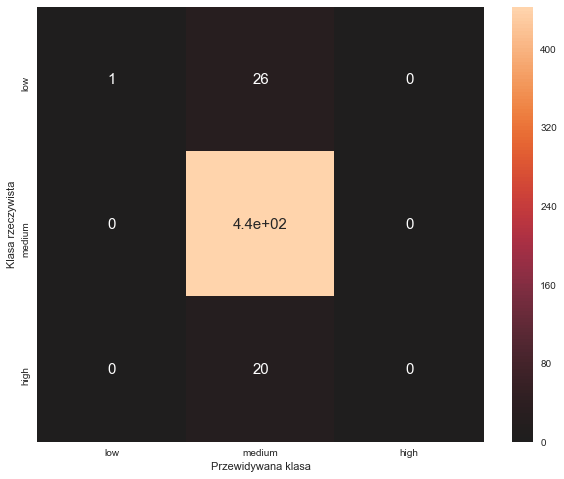

Confusion Matrix:
 [[  1  26   0]
 [  0 443   0]
 [  0  20   0]]
Accuracy: 0.9061224489795918
Score 0.9061224489795918
precision [1.         0.90593047 0.        ]
recall [0.03703704 1.         0.        ]
f1 [0.07142857 0.95064378 0.        ]
support [ 27 443  20]
MSE: 0.306394436993246



c:\python\python35\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


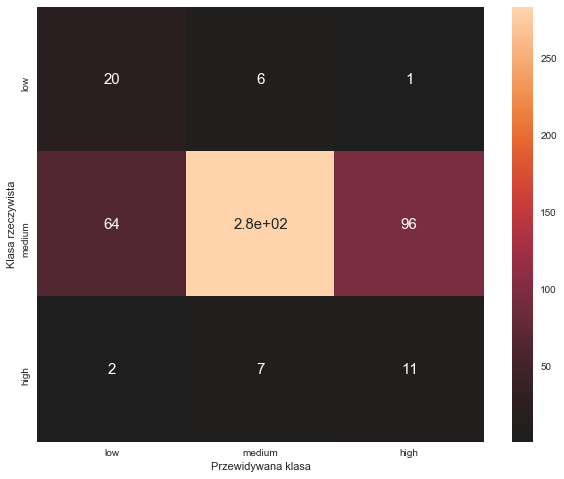

Confusion Matrix:
 [[ 20   6   1]
 [ 64 283  96]
 [  2   7  11]]
Accuracy: 0.6408163265306123
Score 0.6408163265306123
precision [0.23255814 0.95608108 0.10185185]
recall [0.74074074 0.63882619 0.55      ]
f1 [0.3539823  0.76589986 0.171875  ]
support [ 27 443  20]
MSE: 0.614451804788759



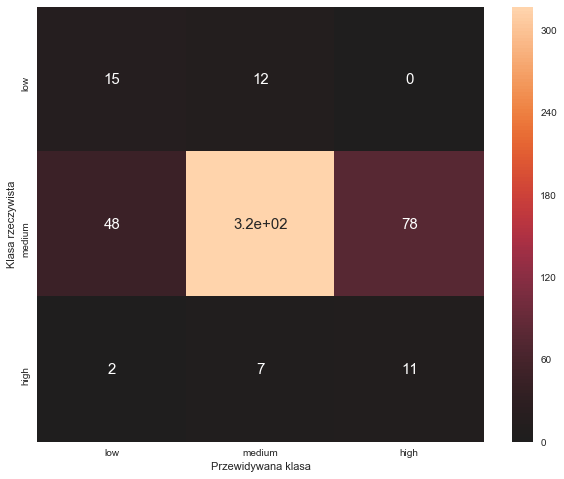

Confusion Matrix:
 [[ 15  12   0]
 [ 48 317  78]
 [  2   7  11]]
Accuracy: 0.7
Score 0.7
precision [0.23076923 0.94345238 0.12359551]
recall [0.55555556 0.71557562 0.55      ]
f1 [0.32608696 0.81386393 0.20183486]
support [ 27 443  20]
MSE: 0.5587887775887985



In [292]:
weights = dict()
sum_ = np.sum([val[1] for val in proportions_unbalanced])
for key, value in proportions_unbalanced:
    weights[reverse_mapping[key]] = sum_/value
print(weights)
run_svm(1, weights)

{0: 2.9865853658536587, 1: 2.2283894449499546, 2: 4.620754716981132}
y_index is 2


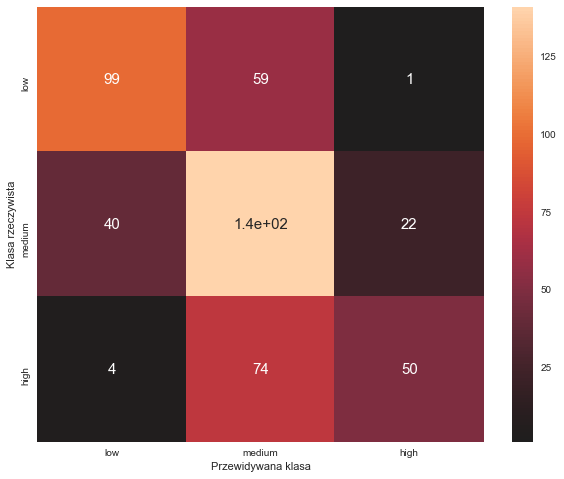

Confusion Matrix:
 [[ 99  59   1]
 [ 40 141  22]
 [  4  74  50]]
Accuracy: 0.5918367346938775
Score 0.5918367346938775
precision [0.69230769 0.51459854 0.68493151]
recall [0.62264151 0.69458128 0.390625  ]
f1 [0.65562914 0.59119497 0.49751244]
support [159 203 128]
MSE: 0.662401321106836



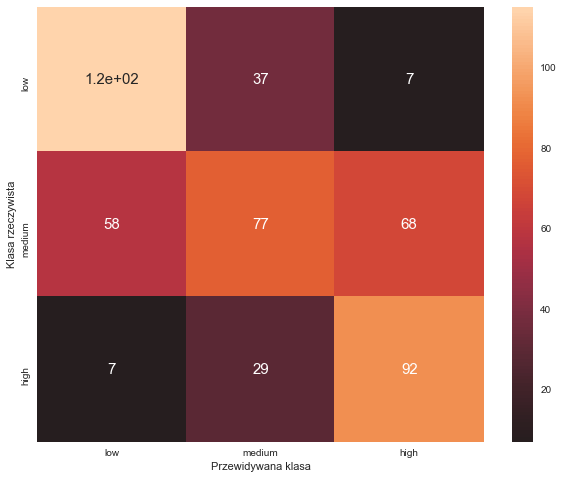

Confusion Matrix:
 [[115  37   7]
 [ 58  77  68]
 [  7  29  92]]
Accuracy: 0.5795918367346938
Score 0.5795918367346938
precision [0.63888889 0.53846154 0.5508982 ]
recall [0.72327044 0.37931034 0.71875   ]
f1 [0.67846608 0.44508671 0.62372881]
support [159 203 128]
MSE: 0.7114228341707847



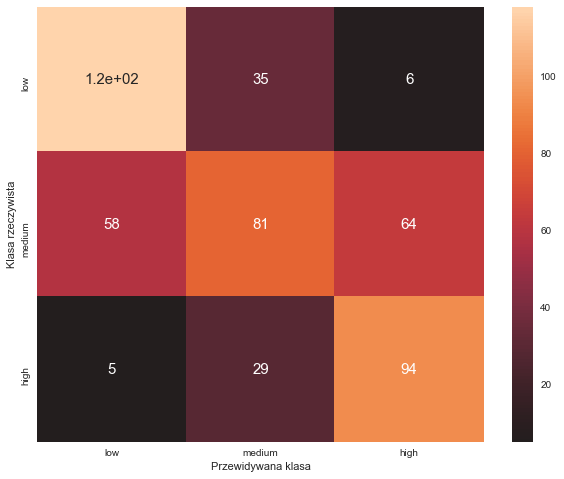

Confusion Matrix:
 [[118  35   6]
 [ 58  81  64]
 [  5  29  94]]
Accuracy: 0.5979591836734693
Score 0.5979591836734693
precision [0.6519337  0.55862069 0.57317073]
recall [0.74213836 0.39901478 0.734375  ]
f1 [0.69411765 0.46551724 0.64383562]
support [159 203 128]
MSE: 0.6851187890446743



In [293]:
weights = dict()
sum_ = np.sum([val[1] for val in proportions_balanced])
for key, value in proportions_balanced:
    weights[reverse_mapping[key]] = sum_/value
print(weights)
run_svm(2, weights)

# Lasso Regression

----------------Lasso Regression------------------------
Predictors and their regression coefficients:
total sulfur dioxide : 0.010840951207879014
fixed acidity : 0.014251274920611876
density : -0.13437512914178312
alcohol : 0.0
chlorides : 0.002121416633922846
pH : 0.020073526459043405
citric acid : 0.0073541579609666795
sulphates : 0.007212834697061737
free sulfur dioxide : 0.01705102733211746
residual sugar : 0.11140700776537907
volatile acidity : -0.036226038647891576

Alpha: 2.958001681886113e-06


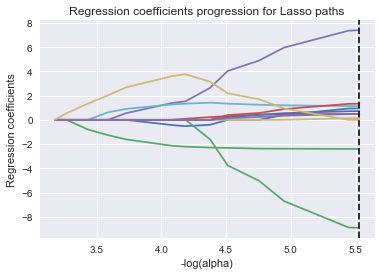

c:\python\python35\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10


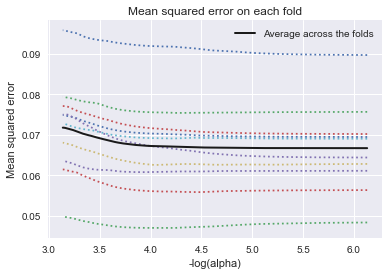


Mean squared error for training data: 0.06600780078932018
Mean squared error for test data: 0.0878979786477447

R-square for training data: 0.07922237947834654
R-square for test data: 0.08166290965042822


In [294]:
from sklearn.linear_model import LassoLarsCV

def lasso_regr(wine_set, y_index):
    # split into training and testing sets
    pred_train, pred_test, tar_train, tar_test = X_train_std, X_test_std, y_train[:, y_index], y_test[:, y_index]

    # specify the lasso regression model
    model = LassoLarsCV(cv=10, precompute=False).fit(pred_train, tar_train)

    print('Predictors and their regression coefficients:')
    d = dict(zip(predictors.columns, model.coef_))
    for k in d:
        print(k, ':', d[k])

    # plot coefficient progression
    m_log_alphas = -np.log10(model.alphas_)
    # ax = plt.gca()
    plt.plot(m_log_alphas, model.coef_path_.T)
    print('\nAlpha:', model.alpha_)
    plt.axvline(-np.log10(model.alpha_), linestyle="dashed", color='k', label='alpha CV')
    plt.ylabel("Regression coefficients")
    plt.xlabel("-log(alpha)")
    plt.title('Regression coefficients progression for Lasso paths')
    plt.show()

    # plot mean squared error for each fold
    m_log_alphascv = -np.log10(model.cv_alphas_)
    plt.plot(m_log_alphascv, model.mse_path_, ':')
    plt.plot(m_log_alphascv, model.mse_path_.mean(axis=-1), 'k', label='Average across the folds', linewidth=2)
    plt.legend()
    plt.xlabel('-log(alpha)')
    plt.ylabel('Mean squared error')
    plt.title('Mean squared error on each fold')
    plt.show()

    # Mean squared error from training and test data
    train_error = mean_squared_error(tar_train, model.predict(pred_train))
    test_error = mean_squared_error(tar_test, model.predict(pred_test))
    print('\nMean squared error for training data:', train_error)
    print('Mean squared error for test data:', test_error)

    rsquared_train = model.score(pred_train, tar_train)
    rsquared_test = model.score(pred_test, tar_test)
    print('\nR-square for training data:', rsquared_train)
    print('R-square for test data:', rsquared_test)
#
print('----------------Lasso Regression------------------------')
lasso_regr(wine_data, 1)



accuracy: 0.919010889292196	loss: 0.2879319472544232
accuracy: 0.6244897959183674	loss: 0.2879319472544232


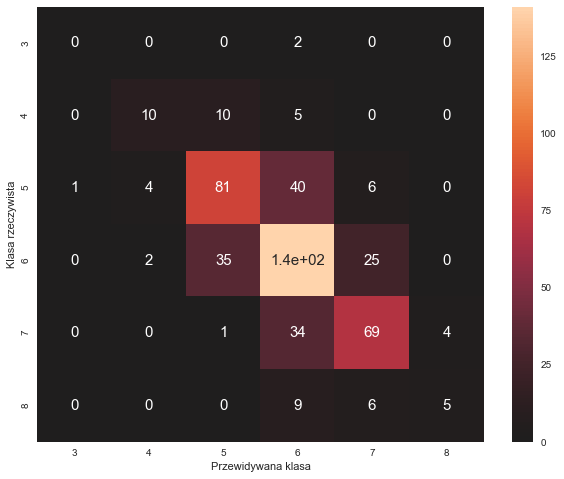

Confusion Matrix:
 [[  0   0   0   2   0   0]
 [  0  10  10   5   0   0]
 [  1   4  81  40   6   0]
 [  0   2  35 141  25   0]
 [  0   0   1  34  69   4]
 [  0   0   0   9   6   5]]
Accuracy: 0.6244897959183674
Score 0.6244897959183674
precision [0.         0.625      0.63779528 0.61038961 0.6509434  0.55555556]
recall [0.         0.4        0.61363636 0.69458128 0.63888889 0.25      ]
f1 [0.         0.48780488 0.62548263 0.64976959 0.64485981 0.34482759]
support [  2  25 132 203 108  20]
MSE: 0.7450517034517313

accuracy: 0.9993194192377496	loss: 0.01118866824318197
accuracy: 0.9102040816326531	loss: 0.01118866824318197


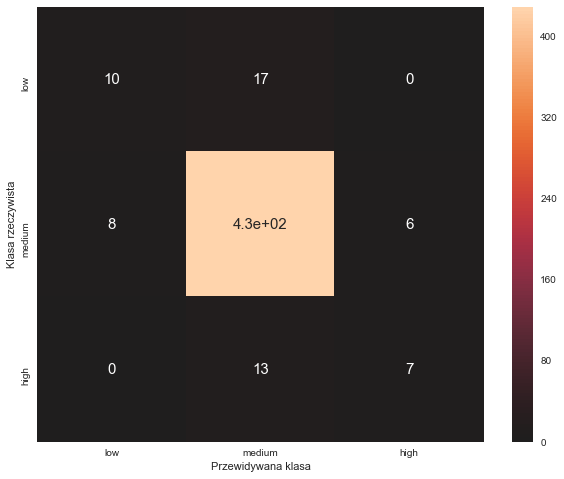

Confusion Matrix:
 [[ 10  17   0]
 [  8 429   6]
 [  0  13   7]]
Accuracy: 0.9102040816326531
Score 0.9102040816326531
precision [0.55555556 0.93464052 0.53846154]
recall [0.37037037 0.96839729 0.35      ]
f1 [0.44444444 0.95121951 0.42424242]
support [ 27 443  20]
MSE: 0.29965967090575757

accuracy: 0.9816243194192378	loss: 0.10505098027651756
accuracy: 0.6795918367346939	loss: 0.10505098027651756


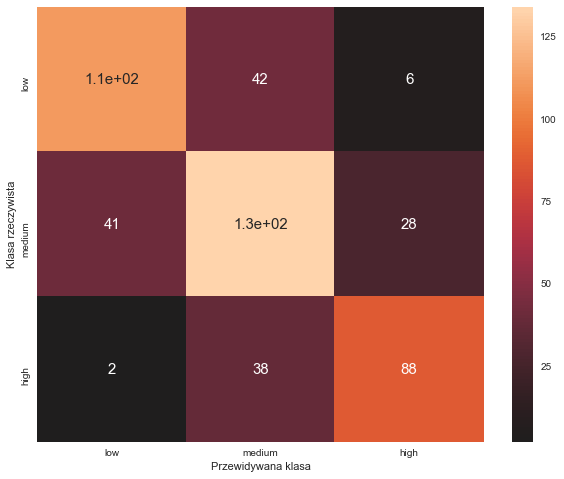

Confusion Matrix:
 [[111  42   6]
 [ 41 134  28]
 [  2  38  88]]
Accuracy: 0.6795918367346939
Score 0.6795918367346939
precision [0.72077922 0.62616822 0.72131148]
recall [0.69811321 0.66009852 0.6875    ]
f1 [0.70926518 0.64268585 0.704     ]
support [159 203 128]
MSE: 0.6077727824623613



In [307]:
from sklearn.neural_network import MLPClassifier, MLPRegressor

def train_using_nn(y_index):
    max_iter = 10000
    clf = MLPClassifier(hidden_layer_sizes=(121, 60, 30), random_state=1,
                        activation='relu',
                        max_iter=max_iter, tol=0, early_stopping=False)
    clf.fit(X_train_std, y_train[:, y_index])
    print('accuracy: {}\tloss: {}'.format(clf.score(X_train_std, y_train[:, y_index]), clf.loss_))
    print('accuracy: {}\tloss: {}'.format(clf.score(X_test_std, y_test[:, y_index]), clf.loss_))

    rate_classifier(clf, X_test_std, y_test[:, y_index], 'nn_{}'.format(y_index))
#     plt.show()

train_using_nn(0)
train_using_nn(1)
train_using_nn(2)